In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
csv_file_path = 'datasetnew.csv'
data = pd.read_csv(csv_file_path)
label_encoder = LabelEncoder()
for i in data.columns:
    if (type(data[i].iloc[0]) == str):
        data[i] = label_encoder.fit_transform(data[i])
        data[i] = data[i].astype(float)
target_column = data['readmission']
data = data.fillna(0.0).astype(float)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print("Original Data:")
print(data)
print("\nNormalized Data:")
print(normalized_data)
mask = ~np.isnan(target_column)
normalized_data = normalized_data[mask]
target_column = target_column[mask]

Original Data:
      discharge_disposition_id  patient_id   age  gender  race  covid19  \
0                          1.0      1001.0  71.0     1.0   0.0      1.0   
1                          2.0      1002.0  56.0     1.0   0.0      0.0   
2                          3.0      1003.0  40.0     0.0   2.0      0.0   
3                          4.0      1004.0  23.0     1.0   2.0      0.0   
4                          5.0      1005.0  45.0     0.0   1.0      1.0   
...                        ...         ...   ...     ...   ...      ...   
1995                    1996.0      2996.0  64.0     0.0   0.0      0.0   
1996                    1997.0      2997.0  66.0     0.0   2.0      0.0   
1997                    1998.0      2998.0  68.0     0.0   1.0      1.0   
1998                    1999.0      2999.0  37.0     1.0   1.0      1.0   
1999                    2000.0      3000.0  70.0     0.0   0.0      1.0   

      covid19_test  chest_xray  wbc_count  crp  ...  alcohol_consumption  \
0       

In [2]:
df=pd.read_csv(csv_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   discharge_disposition_id        2000 non-null   int64  
 1   patient_id                      2000 non-null   int64  
 2   age                             2000 non-null   int64  
 3   gender                          2000 non-null   object 
 4   race                            2000 non-null   object 
 5   covid19                         2000 non-null   int64  
 6   covid19_test                    2000 non-null   object 
 7   chest_xray                      2000 non-null   object 
 8   wbc_count                       2000 non-null   int64  
 9   crp                             2000 non-null   float64
 10  d_dimer                         2000 non-null   int64  
 11  ldh                             2000 non-null   int64  
 12  diabetes                        20

In [3]:
model = LinearRegression()
model.fit(normalized_data, target_column)
weights = model.coef_
weights_rounded = np.round(weights, 3)
print(weights)
formatted_weights = ["{:.3}".format(weight) for weight in weights]

print("Formatted Weights of the attributes:")
print(formatted_weights)
print("average weight")
print(sum(weights)/len(weights))

[-3.36899918e-01  3.36899918e-01 -4.16333634e-17 -8.32667268e-17
  1.66533454e-16 -2.49800181e-16 -2.49800181e-16  1.66533454e-16
 -2.77555756e-17  1.11022302e-16 -1.04083409e-16 -2.77555756e-17
  2.77555756e-16  2.77555756e-16 -5.55111512e-17  0.00000000e+00
 -1.94289029e-16 -4.94396191e-16  1.38777878e-16  5.55111512e-17
  2.22044605e-16  1.11022302e-16 -2.70616862e-16 -3.05311332e-16
 -1.11022302e-16  2.35488712e-16  4.71844785e-16 -1.94289029e-16
  3.60822483e-16 -5.55111512e-17 -3.88578059e-16 -1.11022302e-16
  2.60208521e-16 -7.97972799e-17  2.08166817e-17  1.17961196e-16
 -2.35922393e-16 -4.16333634e-17 -2.42861287e-17 -1.94289029e-16
 -1.11022302e-16 -2.49800181e-16 -2.35922393e-16  2.77555756e-17
 -3.46944695e-17  2.22044605e-16  2.94902991e-17  1.49186219e-16
  1.87350135e-16  1.45716772e-16 -1.97758476e-16 -6.93889390e-18
  1.00000000e+00]
Formatted Weights of the attributes:
['-0.337', '0.337', '-4.16e-17', '-8.33e-17', '1.67e-16', '-2.5e-16', '-2.5e-16', '1.67e-16', '-2.78

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['covid19'])
y = data_cleaned['covid19_test']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_valid_pred = knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

y_test_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")


Validation Accuracy: 0.47
Test Accuracy: 0.47


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['diabetes'])
y = data_cleaned['Insulin Dosage (units/day)']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_valid_pred = knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

y_test_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")


Validation Accuracy: 0.02
Test Accuracy: 0.03


In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_cleaned = data.dropna()
threshold = 1.2
data_cleaned['HighCreatinine'] = (data_cleaned['creatinine_level'] > threshold).astype(int)

X = data_cleaned.drop(columns=['kidney_disease', 'creatinine_level', 'HighCreatinine'])
y = data_cleaned['HighCreatinine']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


y_valid_pred = knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

y_test_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")


Validation Accuracy: 0.73
Test Accuracy: 0.72


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['heart_failure'])
y = data_cleaned['ecg']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)

y_valid_pred = knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

y_test_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")

Validation Accuracy: 0.49
Test Accuracy: 0.50


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['covid19'])
y = data_cleaned['covid19_test']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_valid_pred = logreg.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

y_test_pred = logreg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2f}")


Validation Accuracy: 0.50
Test Accuracy: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error


data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['covid19', 'diabetes', 'kidney_disease', 'heart_failure'])
y_covid19 = data_cleaned['covid19_test']
y_insulin = data_cleaned['Insulin Dosage (units/day)']
y_creatinine = data_cleaned['creatinine_level']
y_ecg = data_cleaned['ecg']

X_encoded = pd.get_dummies(X)

X_train, X_temp, y_train_covid19, y_temp_covid19 = train_test_split(X_encoded, y_covid19, test_size=0.3, random_state=42)
X_valid, X_test, y_valid_covid19, y_test_covid19 = train_test_split(X_temp, y_temp_covid19, test_size=0.5, random_state=42)

knn_covid19 = KNeighborsClassifier(n_neighbors=5)
logreg_covid19 = LogisticRegression()
decision_tree_covid19 = DecisionTreeClassifier()

knn_covid19.fit(X_train, y_train_covid19)

y_valid_pred_covid19 = knn_covid19.predict(X_valid)
accuracy_valid_covid19 = accuracy_score(y_valid_covid19, y_valid_pred_covid19)

y_test_pred_covid19 = knn_covid19.predict(X_test)
accuracy_test_covid19 = accuracy_score(y_test_covid19, y_test_pred_covid19)

all_accuracies_covid19 = [accuracy_valid_covid19, accuracy_test_covid19]

average_accuracy_covid19 = sum(all_accuracies_covid19) / len(all_accuracies_covid19)
print(f"Average Accuracy for covid19_test: {average_accuracy_covid19:.2f}")

X_train, X_temp, y_train_insulin, y_temp_insulin = train_test_split(X_encoded, y_insulin, test_size=0.3, random_state=42)
X_valid, X_test, y_valid_insulin, y_test_insulin = train_test_split(X_temp, y_temp_insulin, test_size=0.5, random_state=42)

knn_insulin = KNeighborsClassifier(n_neighbors=5)
logreg_insulin = LogisticRegression()
decision_tree_insulin = DecisionTreeClassifier()

knn_insulin.fit(X_train, y_train_insulin)

y_valid_pred_insulin = knn_insulin.predict(X_valid)
accuracy_valid_insulin = accuracy_score(y_valid_insulin, y_valid_pred_insulin)

y_test_pred_insulin = knn_insulin.predict(X_test)
accuracy_test_insulin = accuracy_score(y_test_insulin, y_test_pred_insulin)

all_accuracies_insulin = [accuracy_valid_insulin, accuracy_test_insulin]

average_accuracy_insulin = sum(all_accuracies_insulin) / len(all_accuracies_insulin)
print(f"Average Accuracy for Insulin Dosage: {average_accuracy_insulin:.2f}")

X_train, X_temp, y_train_creatinine, y_temp_creatinine = train_test_split(X_encoded, y_creatinine, test_size=0.3, random_state=42)
X_valid, X_test, y_valid_creatinine, y_test_creatinine = train_test_split(X_temp, y_temp_creatinine, test_size=0.5, random_state=42)

regressor_creatinine = DecisionTreeRegressor()

regressor_creatinine.fit(X_train, y_train_creatinine)

y_valid_pred_creatinine = regressor_creatinine.predict(X_valid)

y_test_pred_creatinine = regressor_creatinine.predict(X_test)

mae_valid_creatinine = mean_absolute_error(y_valid_creatinine, y_valid_pred_creatinine)
mae_test_creatinine = mean_absolute_error(y_test_creatinine, y_test_pred_creatinine)

all_maes_creatinine = [mae_valid_creatinine, mae_test_creatinine]

average_mae_creatinine = sum(all_maes_creatinine) / len(all_maes_creatinine)
print(f"Average Mean Absolute Error for creatinine_level: {average_mae_creatinine:.2f}")

X_train, X_temp, y_train_ecg, y_temp_ecg = train_test_split(X_encoded, y_ecg, test_size=0.3, random_state=42)
X_valid, X_test, y_valid_ecg, y_test_ecg = train_test_split(X_temp, y_temp_ecg, test_size=0.5, random_state=42)

knn_ecg = KNeighborsClassifier(n_neighbors=5)
logreg_ecg = LogisticRegression()
decision_tree_ecg = DecisionTreeClassifier()

knn_ecg.fit(X_train, y_train_ecg)

y_valid_pred_ecg = knn_ecg.predict(X_valid)
accuracy_valid_ecg = accuracy_score(y_valid_ecg, y_valid_pred_ecg)

y_test_pred_ecg = knn_ecg.predict(X_test)
accuracy_test_ecg = accuracy_score(y_test_ecg, y_test_pred_ecg)

all_accuracies_ecg = [accuracy_valid_ecg, accuracy_test_ecg]

average_accuracy_ecg = sum(all_accuracies_ecg) / len(all_accuracies_ecg)
print(f"Average Accuracy for ecg: {average_accuracy_ecg:.2f}")

all_average_accuracies = [average_accuracy_covid19, average_accuracy_insulin, average_mae_creatinine, average_accuracy_ecg]
overall_average_accuracy = sum(all_average_accuracies) / len(all_average_accuracies)
print(f"Overall Average Accuracy: {overall_average_accuracy:.2f}")


Average Accuracy for covid19_test: 0.47
Average Accuracy for Insulin Dosage: 0.03
Average Mean Absolute Error for creatinine_level: 0.00
Average Accuracy for ecg: 0.50
Overall Average Accuracy: 0.25


In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

X = data_cleaned.drop(columns=['discharge_destination'])
y = data_cleaned['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

hospital_probabilities = logreg.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': data['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability:")
print(hospital_ranking)


Accuracy on the test set: 0.47

Ranking of Hospitals based on Readmission Probability:
          Readmission Probability
Hospital                         
4.0                      0.482880
5.0                      0.484375
0.0                      0.489705
1.0                      0.490212
6.0                      0.496737
3.0                      0.502714
2.0                      0.509373


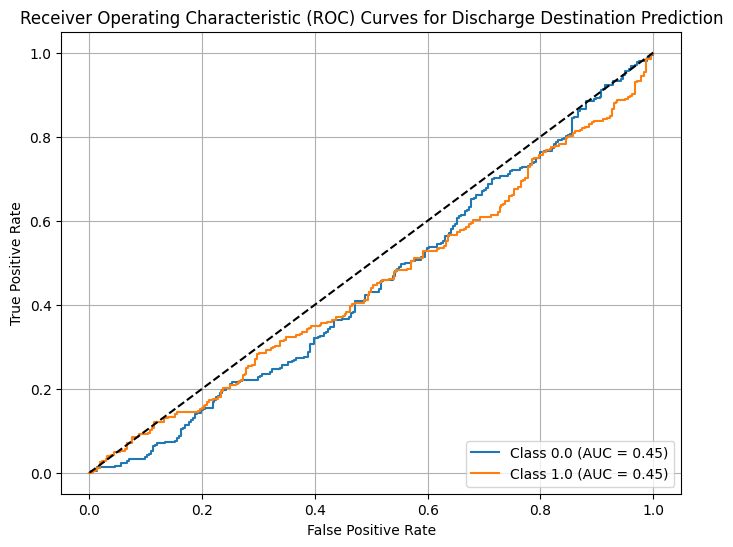

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

X = data_cleaned.drop(columns=['discharge_destination'])
y = data_cleaned['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_probabilities = logreg.predict_proba(X_test_scaled)

n_classes = len(logreg.classes_)
auc_scores = []
fpr_all = []
tpr_all = []

for class_index in range(n_classes):
    y_test_binary = np.where(y_test == logreg.classes_[class_index], 1, 0)
    auc_score = roc_auc_score(y_test_binary, y_test_probabilities[:, class_index])
    auc_scores.append(auc_score)

    fpr, tpr, _ = roc_curve(y_test_binary, y_test_probabilities[:, class_index])
    fpr_all.append(fpr)
    tpr_all.append(tpr)

plt.figure(figsize=(8, 6))
for class_index in range(n_classes):
    plt.plot(fpr_all[class_index], tpr_all[class_index], label=f'Class {logreg.classes_[class_index]} (AUC = {auc_scores[class_index]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Discharge Destination Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_diabetes = data_cleaned[data_cleaned['diabetes'] == 1]

X = data_diabetes.drop(columns=['discharge_destination'])
y = data_diabetes['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

hospital_probabilities = logreg.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': data['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for Diabetes:")
print(hospital_ranking)


Accuracy on the test set: 0.47

Ranking of Hospitals based on Readmission Probability for Diabetes:
          Readmission Probability
Hospital                         
5.0                      0.443341
3.0                      0.472774
1.0                      0.477362
0.0                      0.485812
2.0                      0.486242
6.0                      0.486774
4.0                      0.507040


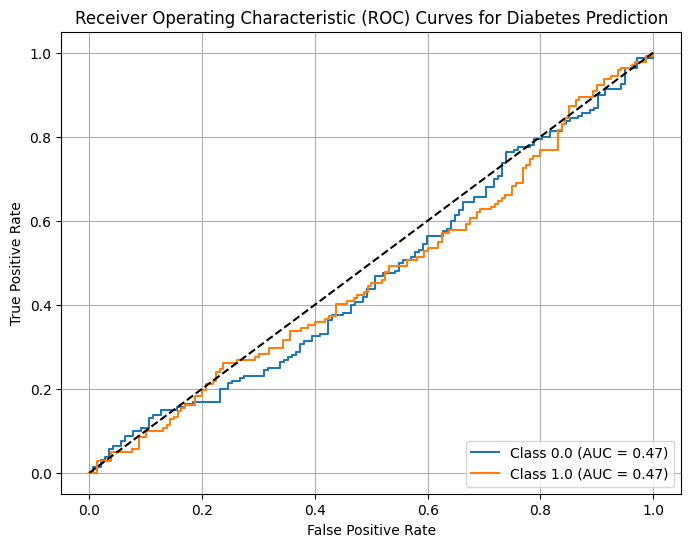

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_diabetes = data_cleaned[data_cleaned['diabetes'] == 1]

X = data_diabetes.drop(columns=['discharge_destination'])
y = data_diabetes['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_probabilities = logreg.predict_proba(X_test_scaled)

n_classes = len(logreg.classes_)
auc_scores = []
fpr_all = []
tpr_all = []

for class_index in range(n_classes):
    y_test_binary = np.where(y_test == logreg.classes_[class_index], 1, 0)
    auc_score = roc_auc_score(y_test_binary, y_test_probabilities[:, class_index])
    auc_scores.append(auc_score)

    fpr, tpr, _ = roc_curve(y_test_binary, y_test_probabilities[:, class_index])
    fpr_all.append(fpr)
    tpr_all.append(tpr)


plt.figure(figsize=(8, 6))
for class_index in range(n_classes):
    plt.plot(fpr_all[class_index], tpr_all[class_index], label=f'Class {logreg.classes_[class_index]} (AUC = {auc_scores[class_index]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Diabetes Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_covid19 = data_cleaned[data_cleaned['covid19'] == 1]

X = data_covid19.drop(columns=['discharge_destination'])
y = data_covid19['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

hospital_probabilities = logreg.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': data['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for COVID-19:")
print(hospital_ranking)


Accuracy on the test set: 0.52

Ranking of Hospitals based on Readmission Probability for COVID-19:
          Readmission Probability
Hospital                         
0.0                      0.455920
6.0                      0.464743
5.0                      0.464761
1.0                      0.466962
4.0                      0.471993
3.0                      0.474463
2.0                      0.508233


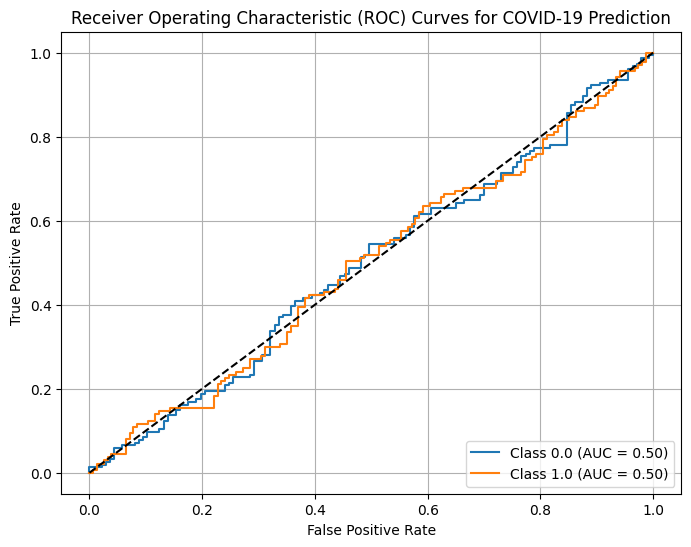

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_covid19 = data_cleaned[data_cleaned['covid19'] == 1]

X = data_covid19.drop(columns=['discharge_destination'])
y = data_covid19['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_probabilities = logreg.predict_proba(X_test_scaled)

n_classes = len(logreg.classes_)
auc_scores = []
fpr_all = []
tpr_all = []

for class_index in range(n_classes):
    y_test_binary = np.where(y_test == logreg.classes_[class_index], 1, 0)
    auc_score = roc_auc_score(y_test_binary, y_test_probabilities[:, class_index])
    auc_scores.append(auc_score)

    fpr, tpr, _ = roc_curve(y_test_binary, y_test_probabilities[:, class_index])
    fpr_all.append(fpr)
    tpr_all.append(tpr)


plt.figure(figsize=(8, 6))
for class_index in range(n_classes):
    plt.plot(fpr_all[class_index], tpr_all[class_index], label=f'Class {logreg.classes_[class_index]} (AUC = {auc_scores[class_index]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for COVID-19 Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_kidney_disease = data_cleaned[data_cleaned['kidney_disease'] == 1]

X = data_kidney_disease.drop(columns=['discharge_destination'])
y = data_kidney_disease['discharge_destination']


X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)


y_test_pred = logreg.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

hospital_probabilities = logreg.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': data['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for Kidney Disease:")
print(hospital_ranking)


Accuracy on the test set: 0.49

Ranking of Hospitals based on Readmission Probability for Kidney Disease:
          Readmission Probability
Hospital                         
0.0                      0.441586
2.0                      0.465508
4.0                      0.476143
5.0                      0.477426
1.0                      0.478866
3.0                      0.494959
6.0                      0.501285


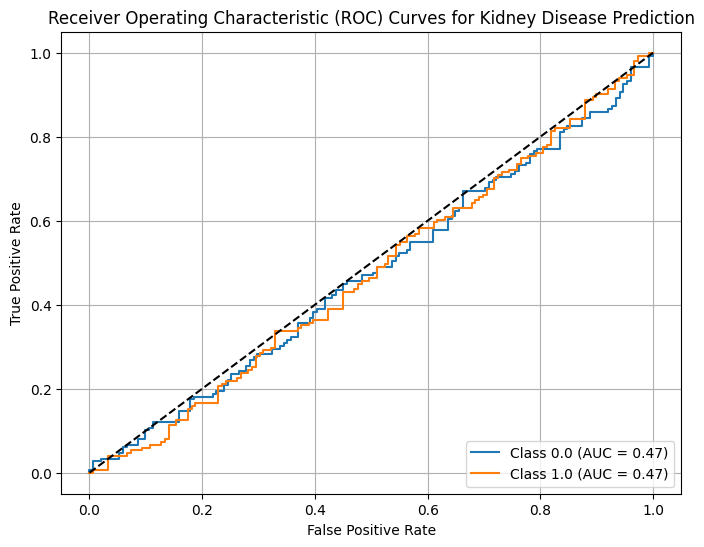

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


y_test_probabilities = logreg.predict_proba(X_test_scaled)

n_classes = len(logreg.classes_)
auc_scores = []
fpr_all = []
tpr_all = []

for class_index in range(n_classes):
    y_test_binary = np.where(y_test == logreg.classes_[class_index], 1, 0)
    auc_score = roc_auc_score(y_test_binary, y_test_probabilities[:, class_index])
    auc_scores.append(auc_score)

    fpr, tpr, _ = roc_curve(y_test_binary, y_test_probabilities[:, class_index])
    fpr_all.append(fpr)
    tpr_all.append(tpr)

plt.figure(figsize=(8, 6))
for class_index in range(n_classes):
    plt.plot(fpr_all[class_index], tpr_all[class_index], label=f'Class {logreg.classes_[class_index]} (AUC = {auc_scores[class_index]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Kidney Disease Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_heart_failure = data_cleaned[data_cleaned['heart_failure'] == 1]

X = data_heart_failure.drop(columns=['discharge_destination'])
y = data_heart_failure['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

y_test_pred = logreg.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy_test:.2f}")

hospital_probabilities = logreg.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': data['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for Heart Failure:")
print(hospital_ranking)


Accuracy on the test set: 0.53

Ranking of Hospitals based on Readmission Probability for Heart Failure:
          Readmission Probability
Hospital                         
5.0                      0.437115
0.0                      0.466943
6.0                      0.475433
3.0                      0.476579
4.0                      0.484593
1.0                      0.493146
2.0                      0.496523


AUC Score: 0.51


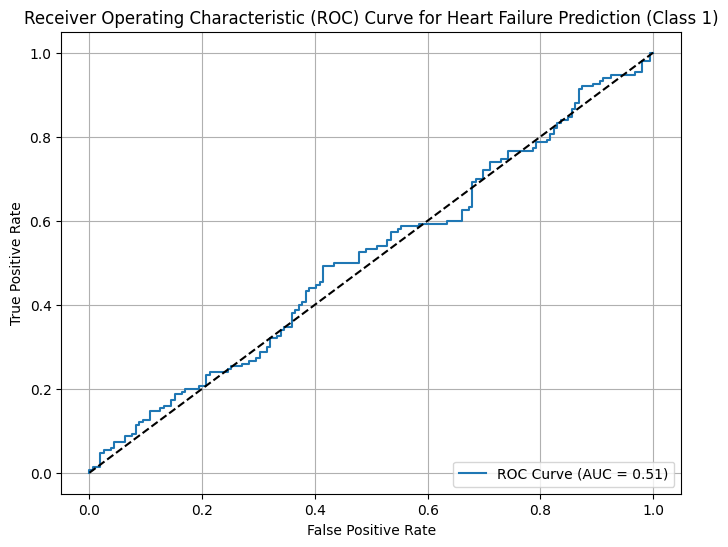

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def convert_to_binary(y, positive_class):
    return np.where(y == positive_class, 1, 0)

positive_class = 1

y_test_binary = convert_to_binary(y_test, positive_class)
y_test_probabilities = logreg.predict_proba(X_test_scaled)[:, positive_class]
auc_score = roc_auc_score(y_test_binary, y_test_probabilities)
print(f"AUC Score: {auc_score:.2f}")

fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Heart Failure Prediction (Class {positive_class})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [22]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_heart_failure = data_cleaned[data_cleaned['heart_failure'] == 1]

X = data_heart_failure.drop(columns=['discharge_destination'])
y = data_heart_failure['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
knn = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn)], voting='soft')


ensemble_model.fit(X_train_scaled, y_train)


joblib.dump(ensemble_model, 'heart_ensemble.joblib')

y_test_pred = ensemble_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set (Ensemble): {accuracy_test:.2f}")

logreg.fit(X_train_scaled, y_train)
y_test_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Accuracy of Logistic Regression on the test set: {accuracy_logreg:.2f}")

knn.fit(X_train_scaled, y_train)
y_test_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Accuracy of k-Nearest Neighbors (KNN) on the test set: {accuracy_knn:.2f}")

hospital_probabilities = ensemble_model.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': df['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for Heart Failure (Ensemble Model):")
print(hospital_ranking)

from sklearn.metrics import precision_score, recall_score, f1_score

precision_ensemble = precision_score(y_test, y_test_pred, average='weighted')
recall_ensemble = recall_score(y_test, y_test_pred, average='weighted')
f1_ensemble = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the test set (Ensemble): {precision_ensemble:.2f}")
print(f"Recall on the test set (Ensemble): {recall_ensemble:.2f}")
print(f"F1 Score on the test set (Ensemble): {f1_ensemble:.2f}")


precision_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

print(f"Precision of Logistic Regression on the test set: {precision_logreg:.2f}")
print(f"Recall of Logistic Regression on the test set: {recall_logreg:.2f}")
print(f"F1 Score of Logistic Regression on the test set: {f1_logreg:.2f}")


precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted')

print(f"Precision of k-Nearest Neighbors (KNN) on the test set: {precision_knn:.2f}")
print(f"Recall of k-Nearest Neighbors (KNN) on the test set: {recall_knn:.2f}")
print(f"F1 Score of k-Nearest Neighbors (KNN) on the test set: {f1_knn:.2f}")

Accuracy on the test set (Ensemble): 0.56
Accuracy of Logistic Regression on the test set: 0.53
Accuracy of k-Nearest Neighbors (KNN) on the test set: 0.54

Ranking of Hospitals based on Readmission Probability for Heart Failure (Ensemble Model):
              Readmission Probability
Hospital                             
mgm                          0.456058
bewell                       0.462900
apollo                       0.466805
rajiv gandhi                 0.468151
ganga                        0.483528
kumaran                      0.506126
cauvery                      0.511052
Precision on the test set (Ensemble): 0.56
Recall on the test set (Ensemble): 0.56
F1 Score on the test set (Ensemble): 0.56
Precision of Logistic Regression on the test set: 0.53
Recall of Logistic Regression on the test set: 0.53
F1 Score of Logistic Regression on the test set: 0.53
Precision of k-Nearest Neighbors (KNN) on the test set: 0.54
Recall of k-Nearest Neighbors (KNN) on the test set: 0.54
F1 Sco

In [23]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_heart_failure = data_cleaned[data_cleaned['covid19'] == 1]

X = data_heart_failure.drop(columns=['discharge_destination'])
y = data_heart_failure['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
knn = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn)], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

joblib.dump(ensemble_model, 'covid.joblib')

y_test_pred = ensemble_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set (Ensemble): {accuracy_test:.2f}")

logreg.fit(X_train_scaled, y_train)
y_test_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Accuracy of Logistic Regression on the test set: {accuracy_logreg:.2f}")

knn.fit(X_train_scaled, y_train)
y_test_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Accuracy of k-Nearest Neighbors (KNN) on the test set: {accuracy_knn:.2f}")

hospital_probabilities = ensemble_model.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': df['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for covid19 (Ensemble Model):")
print(hospital_ranking)

precision_ensemble = precision_score(y_test, y_test_pred, average='weighted')
recall_ensemble = recall_score(y_test, y_test_pred, average='weighted')
f1_ensemble = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the test set (Ensemble): {precision_ensemble:.2f}")
print(f"Recall on the test set (Ensemble): {recall_ensemble:.2f}")
print(f"F1 Score on the test set (Ensemble): {f1_ensemble:.2f}")

precision_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

print(f"Precision of Logistic Regression on the test set: {precision_logreg:.2f}")
print(f"Recall of Logistic Regression on the test set: {recall_logreg:.2f}")
print(f"F1 Score of Logistic Regression on the test set: {f1_logreg:.2f}")

precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted')

print(f"Precision of k-Nearest Neighbors (KNN) on the test set: {precision_knn:.2f}")
print(f"Recall of k-Nearest Neighbors (KNN) on the test set: {recall_knn:.2f}")
print(f"F1 Score of k-Nearest Neighbors (KNN) on the test set: {f1_knn:.2f}")

Accuracy on the test set (Ensemble): 0.49
Accuracy of Logistic Regression on the test set: 0.52
Accuracy of k-Nearest Neighbors (KNN) on the test set: 0.47

Ranking of Hospitals based on Readmission Probability for covid19 (Ensemble Model):
              Readmission Probability
Hospital                             
apollo                       0.447568
mgm                          0.455457
kumaran                      0.459681
ganga                        0.460487
rajiv gandhi                 0.474372
bewell                       0.480849
cauvery                      0.491616
Precision on the test set (Ensemble): 0.49
Recall on the test set (Ensemble): 0.49
F1 Score on the test set (Ensemble): 0.49
Precision of Logistic Regression on the test set: 0.51
Recall of Logistic Regression on the test set: 0.52
F1 Score of Logistic Regression on the test set: 0.51
Precision of k-Nearest Neighbors (KNN) on the test set: 0.47
Recall of k-Nearest Neighbors (KNN) on the test set: 0.47
F1 Score of 

In [24]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_heart_failure = data_cleaned[data_cleaned['kidney_disease'] == 1]

X = data_heart_failure.drop(columns=['discharge_destination'])
y = data_heart_failure['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
knn = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn)], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

joblib.dump(ensemble_model, 'kidney.joblib')

y_test_pred = ensemble_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set (Ensemble): {accuracy_test:.2f}")

logreg.fit(X_train_scaled, y_train)
y_test_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Accuracy of Logistic Regression on the test set: {accuracy_logreg:.2f}")

knn.fit(X_train_scaled, y_train)
y_test_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Accuracy of k-Nearest Neighbors (KNN) on the test set: {accuracy_knn:.2f}")

hospital_probabilities = ensemble_model.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': df['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for Kideney disease (Ensemble Model):")
print(hospital_ranking)

precision_ensemble = precision_score(y_test, y_test_pred, average='weighted')
recall_ensemble = recall_score(y_test, y_test_pred, average='weighted')
f1_ensemble = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the test set (Ensemble): {precision_ensemble:.2f}")
print(f"Recall on the test set (Ensemble): {recall_ensemble:.2f}")
print(f"F1 Score on the test set (Ensemble): {f1_ensemble:.2f}")


precision_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

print(f"Precision of Logistic Regression on the test set: {precision_logreg:.2f}")
print(f"Recall of Logistic Regression on the test set: {recall_logreg:.2f}")
print(f"F1 Score of Logistic Regression on the test set: {f1_logreg:.2f}")


precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted')

print(f"Precision of k-Nearest Neighbors (KNN) on the test set: {precision_knn:.2f}")
print(f"Recall of k-Nearest Neighbors (KNN) on the test set: {recall_knn:.2f}")
print(f"F1 Score of k-Nearest Neighbors (KNN) on the test set: {f1_knn:.2f}")

Accuracy on the test set (Ensemble): 0.51
Accuracy of Logistic Regression on the test set: 0.49
Accuracy of k-Nearest Neighbors (KNN) on the test set: 0.54

Ranking of Hospitals based on Readmission Probability for Kideney disease (Ensemble Model):
              Readmission Probability
Hospital                             
kumaran                      0.456020
cauvery                      0.465186
mgm                          0.466838
bewell                       0.468979
apollo                       0.471736
rajiv gandhi                 0.487852
ganga                        0.497479
Precision on the test set (Ensemble): 0.52
Recall on the test set (Ensemble): 0.51
F1 Score on the test set (Ensemble): 0.50
Precision of Logistic Regression on the test set: 0.49
Recall of Logistic Regression on the test set: 0.49
F1 Score of Logistic Regression on the test set: 0.49
Precision of k-Nearest Neighbors (KNN) on the test set: 0.54
Recall of k-Nearest Neighbors (KNN) on the test set: 0.54
F1 S

In [25]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data_cleaned = data.drop(columns=['discharge_disposition_id', 'patient_id', 'Hospital Name', 'hospital_test_reports', 'readmission'])

data_heart_failure = data_cleaned[data_cleaned['diabetes'] == 1]

X = data_heart_failure.drop(columns=['discharge_destination'])
y = data_heart_failure['discharge_destination']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression()
knn = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn)], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

joblib.dump(ensemble_model, 'diabetes.joblib')

y_test_pred = ensemble_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set (Ensemble): {accuracy_test:.2f}")

logreg.fit(X_train_scaled, y_train)
y_test_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Accuracy of Logistic Regression on the test set: {accuracy_logreg:.2f}")

knn.fit(X_train_scaled, y_train)
y_test_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Accuracy of k-Nearest Neighbors (KNN) on the test set: {accuracy_knn:.2f}")

hospital_probabilities = ensemble_model.predict_proba(X_test_scaled)

hospital_ranking = pd.DataFrame(data={'Hospital': df['Hospital Name'].iloc[X_test.index], 'Readmission Probability': hospital_probabilities[:, 1]})
hospital_ranking = hospital_ranking.groupby('Hospital').mean().sort_values(by='Readmission Probability')

print("\nRanking of Hospitals based on Readmission Probability for diabetes (Ensemble Model):")
print(hospital_ranking)

precision_ensemble = precision_score(y_test, y_test_pred, average='weighted')
recall_ensemble = recall_score(y_test, y_test_pred, average='weighted')
f1_ensemble = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the test set (Ensemble): {precision_ensemble:.2f}")
print(f"Recall on the test set (Ensemble): {recall_ensemble:.2f}")
print(f"F1 Score on the test set (Ensemble): {f1_ensemble:.2f}")

precision_logreg = precision_score(y_test, y_test_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_test_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')

print(f"Precision of Logistic Regression on the test set: {precision_logreg:.2f}")
print(f"Recall of Logistic Regression on the test set: {recall_logreg:.2f}")
print(f"F1 Score of Logistic Regression on the test set: {f1_logreg:.2f}")

precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_test_pred_knn, average='weighted')

print(f"Precision of k-Nearest Neighbors (KNN) on the test set: {precision_knn:.2f}")
print(f"Recall of k-Nearest Neighbors (KNN) on the test set: {recall_knn:.2f}")
print(f"F1 Score of k-Nearest Neighbors (KNN) on the test set: {f1_knn:.2f}")

Accuracy on the test set (Ensemble): 0.56
Accuracy of Logistic Regression on the test set: 0.47
Accuracy of k-Nearest Neighbors (KNN) on the test set: 0.58

Ranking of Hospitals based on Readmission Probability for diabetes (Ensemble Model):
              Readmission Probability
Hospital                             
mgm                          0.440275
bewell                       0.464322
apollo                       0.465548
rajiv gandhi                 0.467197
kumaran                      0.468671
ganga                        0.479244
cauvery                      0.484982
Precision on the test set (Ensemble): 0.56
Recall on the test set (Ensemble): 0.56
F1 Score on the test set (Ensemble): 0.56
Precision of Logistic Regression on the test set: 0.47
Recall of Logistic Regression on the test set: 0.47
F1 Score of Logistic Regression on the test set: 0.47
Precision of k-Nearest Neighbors (KNN) on the test set: 0.58
Recall of k-Nearest Neighbors (KNN) on the test set: 0.58
F1 Score of